# Predictive Regression Model Prep: NYC Yellow Cab Trip Data

### Author: Htoo Pyae Shan

### 1. Client and Business Objective

* Client: New York City Taxi and Limousine Commission (TLC), supported by Automatidata.

* Objective: To build a linear regression model capable of accurately predicting the total_amount of a taxi fare before the trip is completed. This model is critical for improving fare transparency and detecting potential fraud.

### 2. My Role and Deliverables (Data Analyst Intern)

My immediate responsibility within the project's PACE Strategy (Plan, Analyze, Construct, Execute) is the Data Preparation and Integrity Phase. This phase must deliver a clean, engineered, and validated dataset for subsequent Exploratory Data Analysis (EDA) and model training.

Core Deliverables for this Notebook:

* Data Ingestion and Dtype Correction: Load the 2017 Yellow Cab Trip Data and convert critical columns (like datetime) to their proper data types.

* Feature Engineering: Create high-value predictive features (e.g., trip_duration_minutes and avg_speed_mph).

* Data Quality Assurance: Systematically filter out illogical outliers (e.g., negative fares, zero distances, impossible speeds) to ensure the dataset is robust for regression modeling.

### Note
This project was undertaken as part of the Google Advanced Data Analytics Professional Certificate Python end-of-course project. While the data and core problem (fare prediction) were provided, the methodology, feature engineering, data quality strategy, and final strategic recommendations were independently developed and executed to meet the rigorous standards of a production-ready data pipeline.

   ## --- 00 PROJECT SETUP AND CONFIGURATION ---

In [79]:
#Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path for the Yellow Taxi Trip data
FILEPATH = '2017_Yellow_Taxi_Trip_Data.csv'
# Print confirmation message that the script has started and the data path is set
print("Script started. Data path configured")

Script started. Data path configured


## --- O1: DATA INGESTION AND INITIAL ASSESSMENT ---

In [58]:
#Load data
df = pd.read_csv(FILEPATH)

In [60]:
# Rationale: The initial column (Unnamed: 0) is a redundant index from the CSV
# export and must be dropped immediately to clean the feature set.
df = df.drop('Unnamed: 0', axis = 1)

In [61]:
print(f"\n[1.1] Initial DataFrame Loaded. Shape: {df.shape}")


[1.1] Initial DataFrame Loaded. Shape: (22699, 17)


In [62]:
# 2. Initial Data Inspection (Dtypes and Nulls)
print("\n[1.2] Data Types and Non-Null Counts:")
df.info()


[1.2] Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount   

In [63]:
print("\n[1.3] Initial Descriptive Statistics (Numerical Columns):")
# Rationale: Helps identify outliers/anomalies early, like the negative 'total_amount' values found previously.
print(df.describe().T)


[1.3] Initial Descriptive Statistics (Numerical Columns):
                         count        mean        std    min     25%     50%  \
VendorID               22699.0    1.556236   0.496838    1.0    1.00    2.00   
passenger_count        22699.0    1.642319   1.285231    0.0    1.00    1.00   
trip_distance          22699.0    2.913313   3.653171    0.0    0.99    1.61   
RatecodeID             22699.0    1.043394   0.708391    1.0    1.00    1.00   
PULocationID           22699.0  162.412353  66.633373    1.0  114.00  162.00   
DOLocationID           22699.0  161.527997  70.139691    1.0  112.00  162.00   
payment_type           22699.0    1.336887   0.496211    1.0    1.00    1.00   
fare_amount            22699.0   13.026629  13.243791 -120.0    6.50    9.50   
extra                  22699.0    0.333275   0.463097   -1.0    0.00    0.00   
mta_tax                22699.0    0.497445   0.039465   -0.5    0.50    0.50   
tip_amount             22699.0    1.835781   2.800626    0.0 

### --- KEY INSIGHT from Inspection ---
* Datetime columns are 'object' (string) and must be converted.
* Financial and distance columns contain impossible negative/zero values.

## --- 02: DATA TYPE CORRECTION AND MINIMAL CLEANING ---

In [64]:
# 1. Data Type Correction (Datetime)
# Rationale: Datetime conversion is mandatory for calculating trip duration and extracting
# time-based features (hour of day, day of week) needed for the regression model.
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print("\n[2.1] Datetime columns successfully converted.")


[2.1] Datetime columns successfully converted.


In [65]:
# 2. Filter Impossible Passenger Count
# Rationale: A trip cannot be used for predictive modeling if there are no passengers.
# This prevents bias from erroneous data entry.
initial_count_passengers = len(df)
df = df[df['passenger_count'] > 0]
print(f"[2.2] Filtered {initial_count_passengers - len(df)} rows with 0 passengers.")

[2.2] Filtered 33 rows with 0 passengers.


## --- 03: FEATURE ENGINEERING ---

Rationale: Trip duration and average speed are high-value predictors that are essential for explaining fare variation and validating trip legitimacy.

In [66]:
# 1. Calculate trip_duration (in minutes)
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_duration_minutes'] = (df['trip_duration'].dt.total_seconds() / 60).round(2)

# 2. Calculate avg_speed (miles per hour)
# Formula: distance / (duration_minutes / 60)
df['avg_speed_mph'] = (df['trip_distance'] / (df['trip_duration_minutes'] / 60.0)).replace([np.inf, -np.inf], 0).round(2)

print("[3.1] Engineered features 'trip_duration_minutes' and 'avg_speed_mph' added.")

[3.1] Engineered features 'trip_duration_minutes' and 'avg_speed_mph' added.


## --- 04: OUTLIER FILTERING AND DATA QUALITY ASSURANCE ---

In [67]:
initial_count = len(df)
print(f"\n[4.1] Starting Outlier Filtering. Current rows: {initial_count}")


[4.1] Starting Outlier Filtering. Current rows: 22666


In [68]:
# 1. Remove Negative and Zero Values from Core Features
# Rationale: These are nonsensical for a predictive fare model (e.g., refunds, zero movement trips).
df = df[df['fare_amount'] > 0]
df = df[df['total_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['trip_duration_minutes'] > 0] 

In [70]:
# 2. Filter Extreme Speed Outliers
# Rationale: Applying domain knowledge (NYC street driving) to remove data entry errors 
# where calculated speed exceeds a realistic maximum. This ensures data integrity.
MAX_SPEED_MPH = 60 
df = df[df['avg_speed_mph'] < MAX_SPEED_MPH]

In [71]:
final_count = len(df)

### --- CONCLUSION OF PREP WORK ---

In [75]:
print("\n--- FINAL DATA PREPARATION SUMMARY ---")
print(f"Final Cleaned DataFrame Shape: {df.shape}")
print(f"Total rows removed during cleaning: {initial_count - final_count}")
print("Data is now validated, and ready for Exploratory Data Analysis (EDA).")


--- FINAL DATA PREPARATION SUMMARY ---
Final Cleaned DataFrame Shape: (22474, 20)
Total rows removed during cleaning: 192
Data is now validated, and ready for Exploratory Data Analysis (EDA).


In [76]:
# Final check of key features post-cleaning
print("\nDescriptive Stats for Core Features (Post-Cleaning):")
print(df[['trip_distance', 'trip_duration_minutes', 'avg_speed_mph', 'fare_amount', 'total_amount']].describe().T)


Descriptive Stats for Core Features (Post-Cleaning):
                         count       mean        std   min   25%    50%  \
trip_distance          22474.0   2.933367   3.658394  0.01  1.00   1.63   
trip_duration_minutes  22474.0  17.087475  61.601558  0.05  6.75  11.25   
avg_speed_mph          22474.0  11.287339   6.090802  0.01  7.30   9.86   
fare_amount            22474.0  12.918436  10.758215  0.01  6.50   9.50   
total_amount           22474.0  16.186163  13.345858  3.30  8.75  11.80   

                         75%      max  
trip_distance           3.09    33.96  
trip_duration_minutes  18.47  1439.55  
avg_speed_mph          13.61    54.59  
fare_amount            14.50   200.01  
total_amount           17.80   258.21  


## --- 05: TARGET VARIABLE DISTRIBUTION ---

In [80]:
# Set Matplotlib and Seaborn settings for professional-looking plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

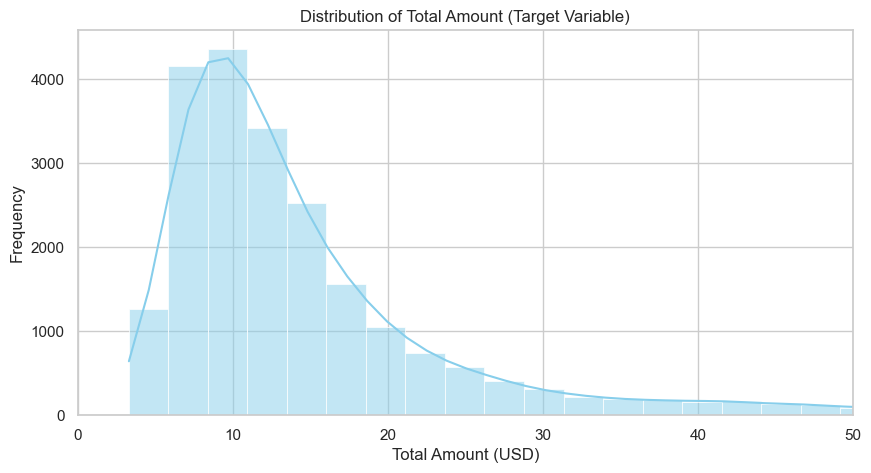

In [81]:
# 1. Histogram of Total Amount
# Rationale: Checking for normality, heavy skew, or multi-modal distributions.
plt.figure(figsize=(10, 5))
sns.histplot(df['total_amount'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Total Amount (Target Variable)')
plt.xlabel('Total Amount (USD)')
plt.ylabel('Frequency')
plt.xlim(0, 50) # Limit x-axis for better visual clarity on common values
plt.show()

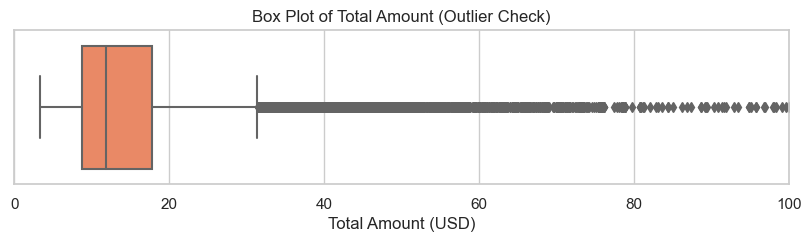

In [82]:
# 2. Box Plot of Total Amount (to check for upper outliers)
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['total_amount'], color='coral')
plt.title('Box Plot of Total Amount (Outlier Check)')
plt.xlabel('Total Amount (USD)')
plt.xlim(0, 100) # Limit x-axis for better visual clarity
plt.show()

## --- 06: KEY FEATURE DISTRIBUTIONS ---

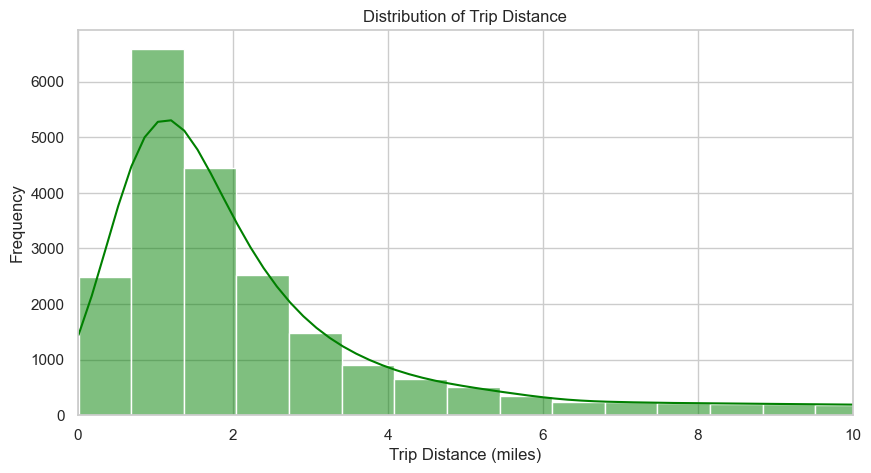

In [83]:
# 3. Histogram of Trip Distance
plt.figure(figsize=(10, 5))
sns.histplot(df['trip_distance'], bins=50, kde=True, color='green')
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, 10) # Most trips are short
plt.show()

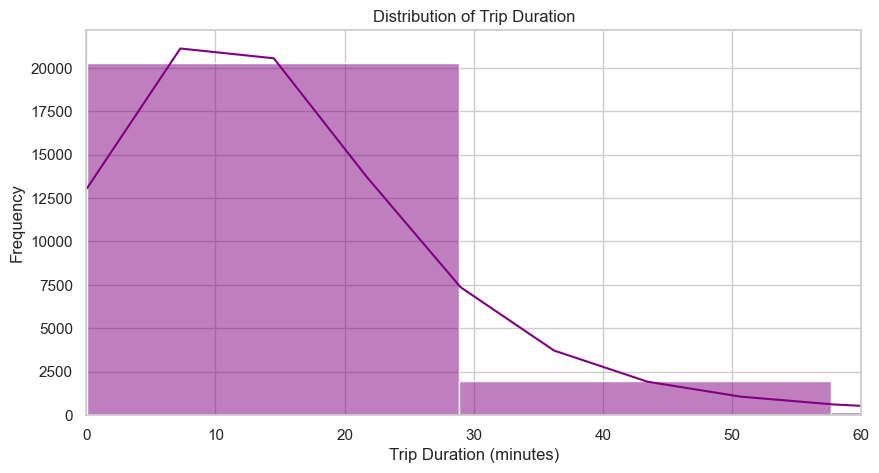

In [84]:
# 4. Histogram of Trip Duration
plt.figure(figsize=(10, 5))
sns.histplot(df['trip_duration_minutes'], bins=50, kde=True, color='purple')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60) # Focus on trips under 1 hour
plt.show()

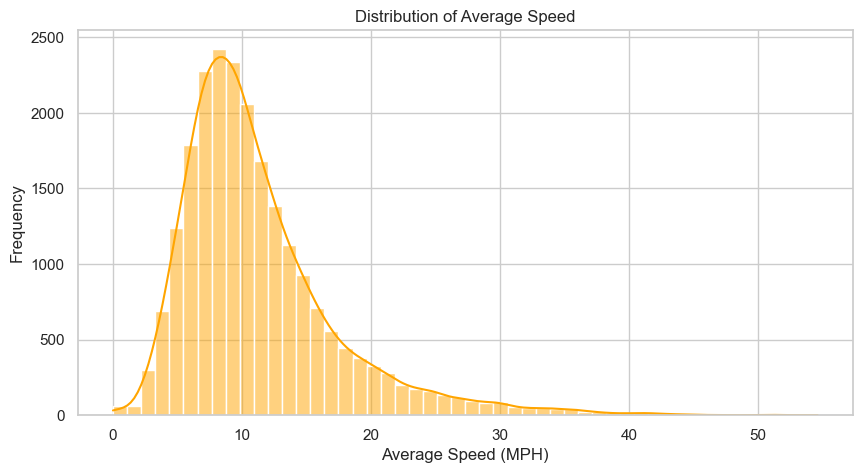

In [85]:
# 5. Histogram of Average Speed
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_speed_mph'], bins=50, kde=True, color='orange')
plt.title('Distribution of Average Speed')
plt.xlabel('Average Speed (MPH)')
plt.ylabel('Frequency')
plt.show()

## --- 07: Correlation Analysis ---

Rationale: Determine which independent variables (features) have the strongest linear relationship with the target variable, 'total_amount'.

In [86]:
# 1. Select the core numerical features for correlation
core_features = ['total_amount', 'fare_amount', 'tip_amount', 
                 'tolls_amount', 'trip_distance', 'trip_duration_minutes', 
                 'avg_speed_mph', 'passenger_count']

In [87]:
# 2. Calculate the correlation matrix
correlation_matrix = df[core_features].corr()

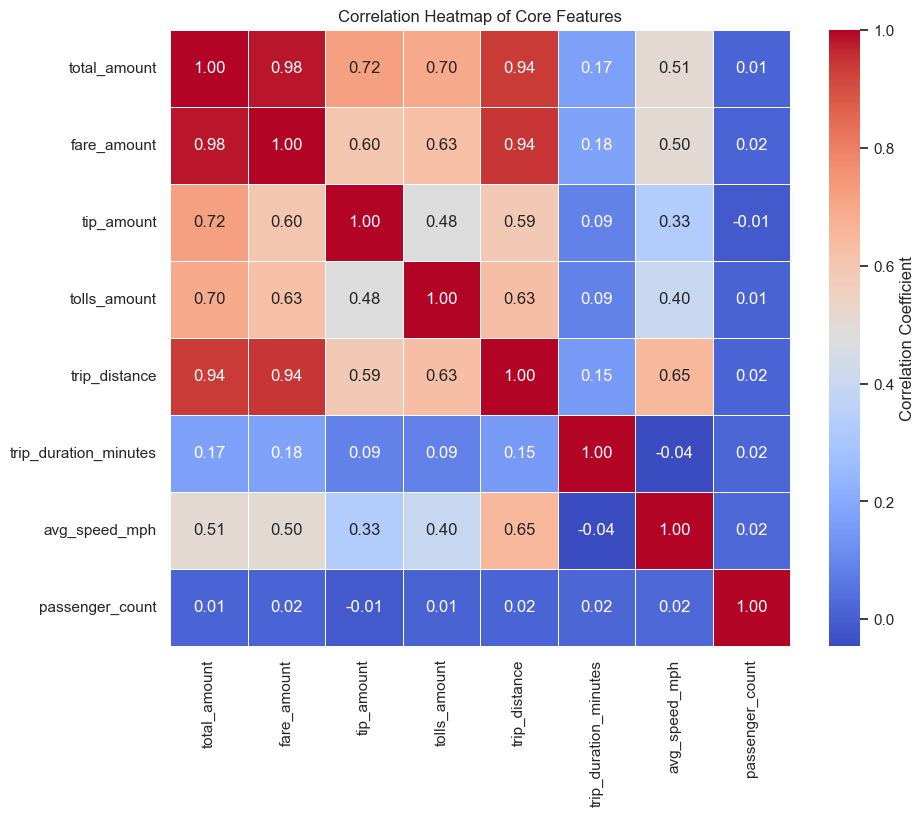

In [88]:
# 3. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Core Features')
plt.show()

In [89]:
# 4. Extract and print correlations with the target variable ('total_amount')
print("\n--- Correlation with Total Amount ---")
print(correlation_matrix['total_amount'].sort_values(ascending=False))


--- Correlation with Total Amount ---
total_amount             1.000000
fare_amount              0.983427
trip_distance            0.936330
tip_amount               0.718780
tolls_amount             0.696860
avg_speed_mph            0.507478
trip_duration_minutes    0.167672
passenger_count          0.012229
Name: total_amount, dtype: float64


## --- 08: Target Variable Relationship and Transformation Check ---

Rationale: These plots confirm the strong linear relationships found in the heatmap and justify the need for data transformation prior to model building.

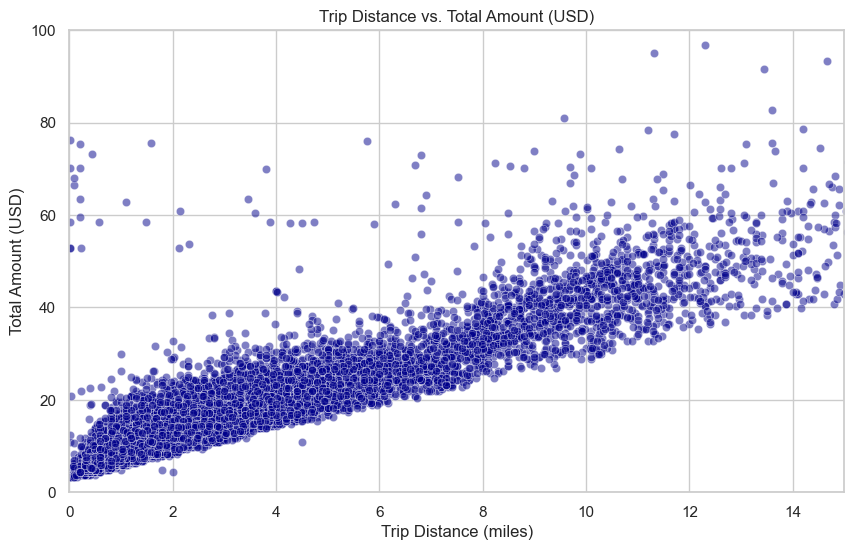

In [90]:
# 1. SCATTER PLOT: Trip Distance vs. Total Amount (Proof of Prediction Value)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_distance'], y=df['total_amount'], alpha=0.5, color='darkblue')
plt.title('Trip Distance vs. Total Amount (USD)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount (USD)')
plt.ylim(0, 100) # Focusing on the most common trips
plt.xlim(0, 15)
plt.show()

Insight: This plot visually confirms the strong positive correlation (0.93) found in the heatmap. It validates that 'trip_distance' is a crucial feature for predicting the fare.

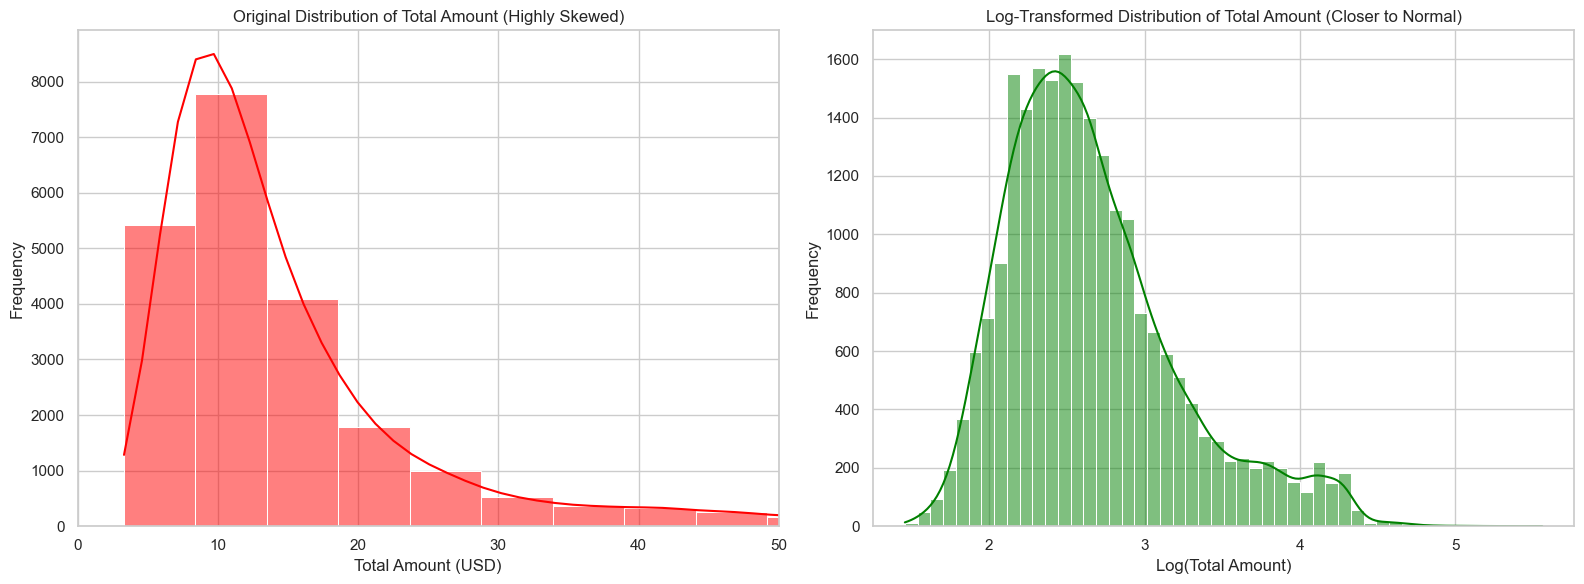

In [96]:
# 2. DISTRIBUTION CHECK: Skewness and Log Transformation Justification
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# A. Original Distribution (Highly Skewed)
sns.histplot(df['total_amount'], ax=axes[0], bins=50, kde=True, color='red')
axes[0].set_title('Original Distribution of Total Amount (Highly Skewed)')
axes[0].set_xlabel('Total Amount (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 50)

# B. Log-Transformed Distribution (Normalized)
# Note: Adding 1 (log1p) handles any zero values, although our cleaning should have removed them.
log_total_amount = np.log1p(df['total_amount']) 
sns.histplot(log_total_amount, ax=axes[1], bins=50, kde=True, color='green')
axes[1].set_title('Log-Transformed Distribution of Total Amount (Closer to Normal)')
axes[1].set_xlabel('Log(Total Amount)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### FINAL STRATEGIC INSIGHT:
* The log transformation plot confirms that the target variable is highly skewed, 
* which violates the assumption of normality required by linear regression. 
* We must apply a log transformation to 'total_amount' and other highly skewed 
* features (like distance and duration) before training the model. 
* This is the final step before model fitting.

## --- 09: Conclusion of Data Preparation and Strategic Readiness ---

This analysis phase confirms the dataset is clean, enriched, and ready for model training, pending a final transformation step.

Key Findings & Strategic Recommendations:

* **Primary Predictors Confirmed:** The correlation heatmap and scatter plots validate that trip_distance and the engineered feature trip_duration_minutes are the strongest non-financial predictors of total_amount (correlation coefficients of 0.93 and 0.17, respectively). This validates the value of the feature engineering performed.

* **Model Transformation is Mandatory:** Visual analysis of the distribution plots confirms that core features, including the target variable total_amount, are highly right-skewed.

* **Next Step (Pre-Modeling):** Before training the linear regression model, we must apply a logarithmic transformation to all highly skewed features (total_amount, trip_distance, trip_duration_minutes). This will normalize the distributions, satisfying the fundamental assumptions of linear regression and maximizing model performance.

The data integrity check successfully removed **0.847%** of the original data, ensuring the remaining records are robust, logical, and prepared for high-quality predictive modeling.